# Project 2: Reproducibility in Natural Language Processing



### Read Data

In [16]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark') 

In [17]:
# read in SOTU.csv 
sou = pd.read_csv('data/SOTU.csv')
sou.head()

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169


## Part 4: Choose your own advecnture! (7 Points; Optional for Extra Credit)

This section is open ended and your chance to explare any advanced analysis. Please perform any additional analysis you find interesting! Suggested analyses (only do one max):

- Topic evolution over time - see https://maartengr.github.io/BERTopic/getting_started/topicsovertime/topicsovertime.html#visualization 
- Word frequency over time - does the frequency of certain words change over time
- Semantic similarity - investigate similarity within and between presidents or time periods. For example, similarity between one presidents speeches, e.g. are all of Biden's speeches similar to each other? How similar are they to Trump's speeches? Are speeches from the 2000s more similar to each other than speeches in the 1800s? Which two presidents have the most similar speeches? See https://spacy.io/usage/linguistic-features#vectors-similarity 
-  Named Entity Recognition - which entity types are most common in speeches? What are the most common words for each entity type - see https://spacy.io/usage/linguistic-features#named-entities 
- Classification - can you build a classifier to detect democratic versus republican state of the union speeches from 1980-2024 - see https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py 


outputs/Part_4_plot_word_frequency_over_time.png


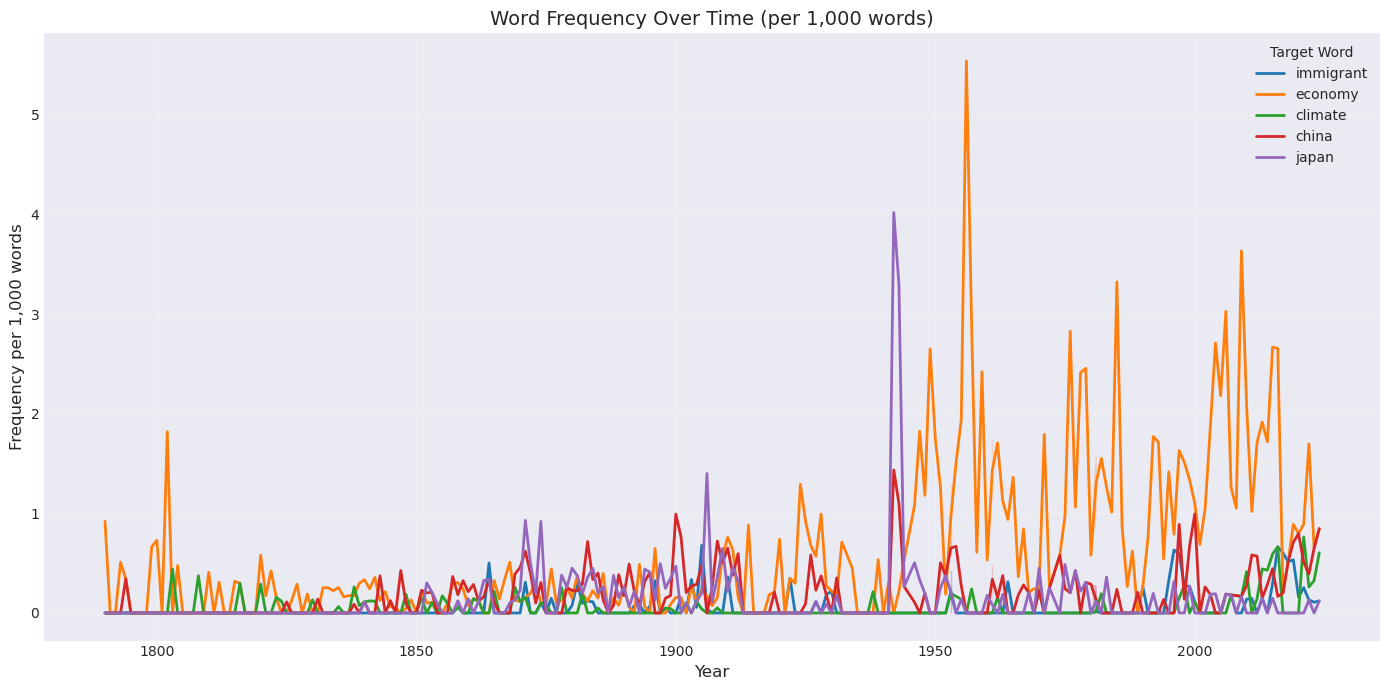

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd


def plot_word_frequency_over_time(df, target_words):
    data_rows = []
    for index, row in df.iterrows():
        year = row['Year']
        text = row['Text'].lower() 
        
        
        total_words = len(text.split())
        
        if total_words == 0: continue
            
        for word in target_words:
           
            count = text.count(word)
            
            freq_per_1k = (count / total_words) * 1000
            
            data_rows.append({
                'Year': year,
                'Word': word,
                'Frequency': freq_per_1k
            })
            
    freq_df = pd.DataFrame(data_rows)
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=freq_df, x='Year', y='Frequency', hue='Word', linewidth=2)
    
    plt.title('Word Frequency Over Time (per 1,000 words)', fontsize=14)
    plt.ylabel('Frequency per 1,000 words', fontsize=12)
    plt.xlabel('Year', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(title='Target Word')  
    plt.subplots_adjust(hspace=0.5)
    plt.tight_layout()
    save_path = "outputs/Part_4_plot_word_frequency_over_time.png"
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(save_path)
    plt.show()



interesting_words = ['immigrant', 'economy', 'climate', 'china', 'japan']

plot_word_frequency_over_time(sou, interesting_words)
plt.savefig("save_filename", dpi=300, bbox_inches="tight")